In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report, confusion_matrix
import graphviz 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.externals.six import StringIO  
from sklearn import tree
import seaborn as sns
import os


In [39]:
os.chdir('C:/Users/Home/Documents/Laboral2020/Konrad Lorenz/MachineLearning/Clase 7')
df = pd.read_csv('DT-Regression-Data.csv')
df.head()

,x,y
0,56.000000,157.553428
1,75.636364,156.479835
2,95.272727,158.248104
3,114.909091,160.195151
4,134.545455,156.877148


In [40]:
df.shape


(100, 2)

In [41]:
x = df.x
y = df.y
x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=42)

In [42]:
DecisionTreeRegModel = DecisionTreeRegressor()
DecisionTreeRegModel.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [43]:
y_pred = DecisionTreeRegModel.predict(x_test)
y_pred

array([171.43755825, 165.41706509, 173.57789131, 164.67144973,
       164.40142897, 161.36544608, 160.23208376, 168.09758944,
       157.19196032, 156.47983503, 160.52667648, 161.67115795,
       165.85141888, 162.81664191, 175.0628985 , 160.19515062,
       172.93107774, 172.05988519, 155.85925524, 162.81664191,
       169.22563541, 174.30113858, 160.18396182, 164.40142897,
       170.63599932, 155.85925524, 164.95364565, 176.12938327,
       157.19196032, 173.57789131, 157.19196032, 166.67269112,
       171.43755825, 161.67115795, 173.22134836, 160.89660745,
       171.72342943, 170.75232437, 164.0468181 , 160.52667648,
       166.67269112, 162.81664191, 160.89660745, 174.23396551,
       161.67115795, 163.41857027, 175.61760627, 160.18396182,
       168.16686386, 155.85925524])

In [44]:
r2_score(y_test, y_pred)


0.8302300393690947

In [45]:
mse = mean_squared_error(y_test, y_pred)
mse

6.097253764945947

In [46]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

2.469261785422102

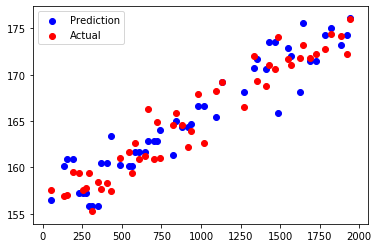

In [47]:
import matplotlib.pyplot as plt
plt.scatter(x_test,y_pred,color='blue',label='Prediction')
plt.scatter(x_test,y_test,color='red',label='Actual')
#plt.scatter(x_trn,m.predict(x_trn),color='blue')
#plt.scatter(x_trn,y_trn,color='red')
plt.legend(loc='upper left')

In [51]:
dot_data = tree.export_graphviz(DecisionTreeRegModel, out_file='tree.dot') 
# http://webgraphviz.com/

In [24]:
# Ejemplo 2

In [1]:
# Ejemplo árboles

In [4]:
os.chdir(r'C:\Users\Home\Documents\Laboral2020\Konrad Lorenz\MachineLearning\Clase 7')

In [8]:
df_boston = pd.read_csv('Boston.csv')
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [56]:
X = df_boston.drop('medv', axis=1)
y = df_boston.medv
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=12345)


In [57]:
# Pruning not supported. Choosing max depth 3)
regr2 = DecisionTreeRegressor(max_depth=3)
regr2.fit(X_train, y_train)
pred = regr2.predict(X_test)

In [58]:
arbol = tree.export_graphviz(regr2, out_file='tree2.dot') 
# http://webgraphviz.com/

Text(0, 0.5, 'y_test')

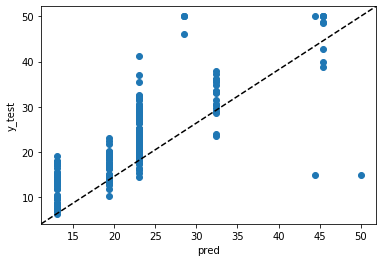

In [59]:
plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [60]:
mean_squared_error(y_test, pred)


31.09939895827625

In [62]:
r2_score(y_test, pred)


0.6126822395803584

In [63]:
## Árboles de clasificación

In [66]:
os.chdir(r'C:\Users\Home\Documents\Laboral2020\Konrad Lorenz\MachineLearning\Clase 7')
carseats = pd.read_csv('Carseats.csv').drop('Unnamed: 0', axis=1)
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


Datos de ventas de sillas de niños en 400 tiendas. Se disponen de las siguientes variables:
* Sales: unidades vendidas en miles en cada localización.
* CompPrice: precio del competidor en cada localización.
* Income: nivel de ingreso de la comunidad (en miles de dolares).
* Advertising: presupuesto de publicidad en cada localización.
* Population: tamaño de la población (en miles= en la región).
* Price: precio cobrado por las sillas de niños pequeños en cada localización.
* ShelveLoc: calidad de las estanterias donde se encuentran las sillas: Malo, Medio y Bueno.
* Age: edad promedio de la población.
* Education: nivel educativo en cada localización.
* Urban: un factor con etiquetas de No y si que indica si la tienda está localizado en la parte urbana o en la parte rural.
* US: la tienda está en Estados Unidos o no.

In [67]:
carseats.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


Se considera como variable target las tiendas que venden más de 8 sillas.

In [73]:
carseats['High'] = carseats.Sales.map(lambda x: 1 if x>8 else 0)
carseats.ShelveLoc = pd.factorize(carseats.ShelveLoc)[0]
carseats.Urban = carseats.Urban.map({'No':0, 'Yes':1})
carseats.US = carseats.US.map({'No':0, 'Yes':1})
carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
 11  High         400 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 37.6 KB


In [74]:
carseats.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In [75]:
X = carseats.drop(['Sales', 'High'], axis=1)
y = carseats.High

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=12345)


In [85]:
arbol_clasif = DecisionTreeClassifier(max_depth=6)
arbol_clasif.fit(X, y)
y_pred = arbol_clasif.predict(X_test)

In [81]:
print(classification_report(y, arbol_clasif.predict(X)))


              precision    recall  f1-score   support

           0       0.89      0.99      0.93       236
           1       0.98      0.82      0.89       164

    accuracy                           0.92       400
   macro avg       0.93      0.90      0.91       400
weighted avg       0.92      0.92      0.92       400



In [82]:

arbol = tree.export_graphviz(arbol_clasif, out_file='tree3.dot') 


In [86]:
confusion_matrix(y_test, y_pred)


array([[120,   1],
       [ 14,  65]], dtype=int64)

In [87]:
# Bagging

In [88]:
X = df_boston.drop('medv', axis=1)
y = df_boston.medv
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=12345)

In [89]:
X.shape


(506, 13)

In [92]:
# Bagging: using all features
regr1 = RandomForestRegressor(max_features=13, random_state=1)
regr1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=13, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

Text(0, 0.5, 'y_test')

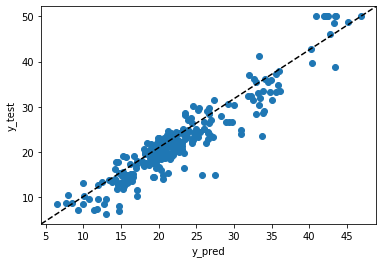

In [94]:
y_pred = regr1.predict(X_test)

plt.scatter(y_pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('y_pred')
plt.ylabel('y_test')

In [95]:
mean_squared_error(y_test, pred)


9.818210146245054

In [98]:
r2_score(y_test, y_pred)


0.8777221652973125

In [97]:
# Random forests: using 6 features
rf = RandomForestRegressor(max_features=6, random_state=1)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [101]:
y_pred = rf.predict(X_test)
mean_squared_error(y_test, y_pred)

9.462423276679825

In [102]:
r2_score(y_test, y_pred)


0.8821532018485847

Text(0.5, 0, 'Variable Importance')

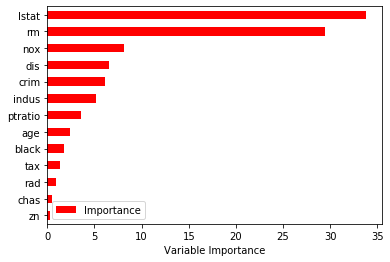

In [105]:
 
Importance = pd.DataFrame({'Importance':rf.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None